In [1]:
import empiricaldist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import palmerpenguins
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [34]:
penguin_color = {
    'Adelie': '#ff6602',
    'Gentoo': '#0f7175',
    'Chinstrap': '#c65dc9'
}

In [6]:
pg = palmerpenguins.load_penguins()

## Conteos y proporciones

### Preludio: ¿Qué estadísticos describen el conjunto de datos?

Todas las varibles

In [13]:
pg.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [14]:
pg.describe(include=np.number)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [15]:
pg.describe(include=object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [23]:
(
    pg
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include='category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


### ¿Cómo visualizar los conteos?

Pandas

<Axes: xlabel='species', ylabel='count'>

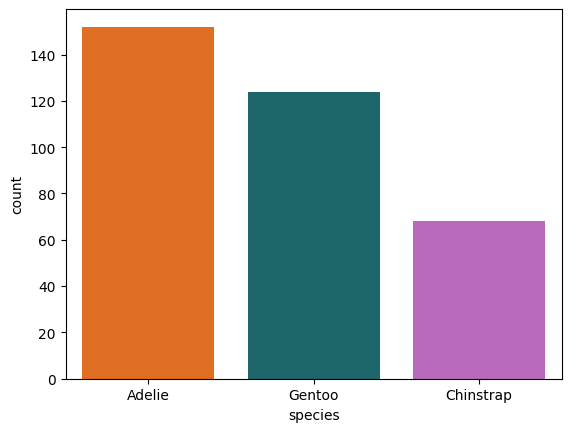

In [43]:
(
    pg['species']
    .value_counts()
    .reset_index()
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'species',
                y= 'count',
                hue= 'species',
                palette= penguin_color
            )
        )
    )
)

Seaborn

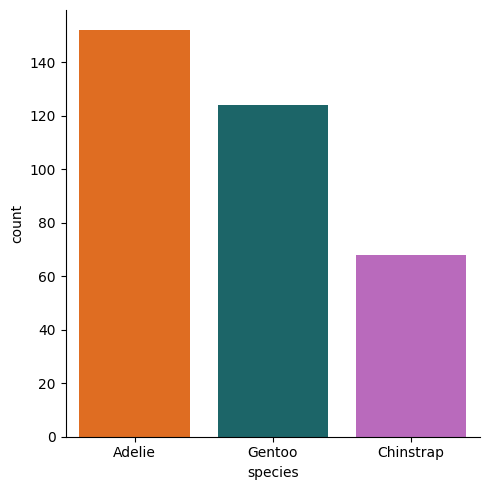

In [44]:
sns.catplot(
    data= pg,
    x= 'species',
    kind= 'count',
    hue= 'species',
    palette= penguin_color
)

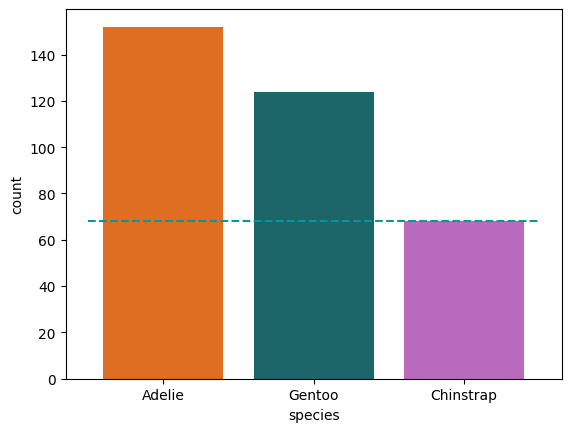

In [63]:
(
    pg
    .value_counts(
        'species',
        sort=True
    )
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data= df,
                x= 'species',
                y= 'count',
                hue= 'species',
                palette= penguin_color
            )
        )
    )
)

plt.hlines(
    y=(
        pg
        .value_counts(
            'species',
            sort=True
        )
        .reset_index(name='count')
        .pipe(
            lambda df: df["count"].min()
        )
    ),
    xmin=-0.5,
    xmax=2.5,
    color= '#009999',
    linestyles= '--'
)

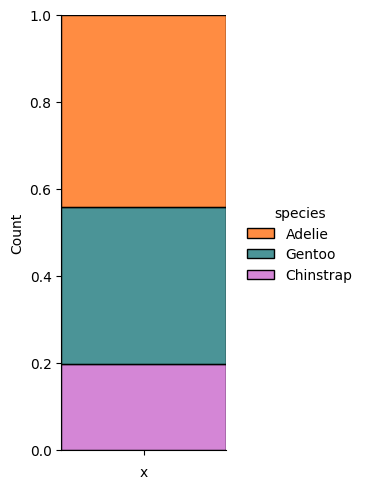

In [90]:
(
    pg
    .assign(
        x= ''
    )
    .pipe(
        lambda df: (
            sns.displot(
                data= df,
                x= 'x',
                hue= 'species',
                multiple= 'fill',
                palette= penguin_color,
                aspect= 0.5
            )
        )
    )
)